In [1]:
%pip install pandas seaborn numpy matplotlib scikit-learn xgboost lightgbm keras tensorflow


  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------------------------- ------------- 30.7/46.2 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 765.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached protobuf-4.25.3-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.1 MB 3.2 MB/s eta 0:00:01
   ------- -----------


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd  # 데이터 분석 라이브러리
import seaborn as sn  # 데이터 시각화 라이브러리
import numpy as np  # 수치 계산 라이브러리
import matplotlib.pyplot as plt  # 그래프 시각화 라이브러리
from sklearn.model_selection import train_test_split  # 데이터 분할을 위한 라이브러리
from sklearn.preprocessing import LabelEncoder  # 문자형 데이터를 숫자로 변환하기 위한 라이브러리
from sklearn.linear_model import LogisticRegression  # 로지스틱 회귀 모델
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier  # 앙상블 학습 모델들
from xgboost import XGBClassifier  # XGBoost 모델
from lightgbm import LGBMClassifier  # LightGBM 모델
from sklearn.tree import DecisionTreeClassifier  # 결정 트리 모델
from keras.models import Sequential  # 신경망 모델 구축을 위한 라이브러리
from keras.layers import Dense  # 신경망의 Dense 레이어
import keras.activations, keras.metrics, keras.losses  # 케라스의 활성화 함수, 메트릭, 손실 함수


In [5]:
data = pd.read_csv(r'C:\Users\USER\Desktop\실습\개인작업/supervised_dataset.csv')  # 데이터 불러오기
print(data.columns)  # 열 이름 출력
print(data.isna().sum())  # 결측치 개수 출력
print(data.describe())  # 데이터 통계 정보 출력
print(data.info())  # 데이터 타입과 메모리 사용량 정보 출력
print(data)

Index(['Unnamed: 0', '_id', 'inter_api_access_duration(sec)',
       'api_access_uniqueness', 'sequence_length(count)',
       'vsession_duration(min)', 'ip_type', 'num_sessions', 'num_users',
       'num_unique_apis', 'source', 'classification'],
      dtype='object')
Unnamed: 0                        0
_id                               0
inter_api_access_duration(sec)    4
api_access_uniqueness             4
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
classification                    0
dtype: int64
       Unnamed: 0  inter_api_access_duration(sec)  api_access_uniqueness  \
count  1699.00000                     1695.000000            1695.000000   
mean    849.00000                        1.501123               0.173226   
std     490.60337                       21.697558        

3. 결측치 처리
- 결측치가 있는 열의 결측치를 해당 열의 평균값으로 채웁니다.

In [6]:
data['inter_api_access_duration(sec)'] = data['inter_api_access_duration(sec)'].fillna(data['inter_api_access_duration(sec)'].mean())
data['api_access_uniqueness'] = data['api_access_uniqueness'].fillna(data['api_access_uniqueness'].mean())


4. 데이터 상관관계 시각화
- 데이터의 상관관계를 히트맵으로 시각화합니다.

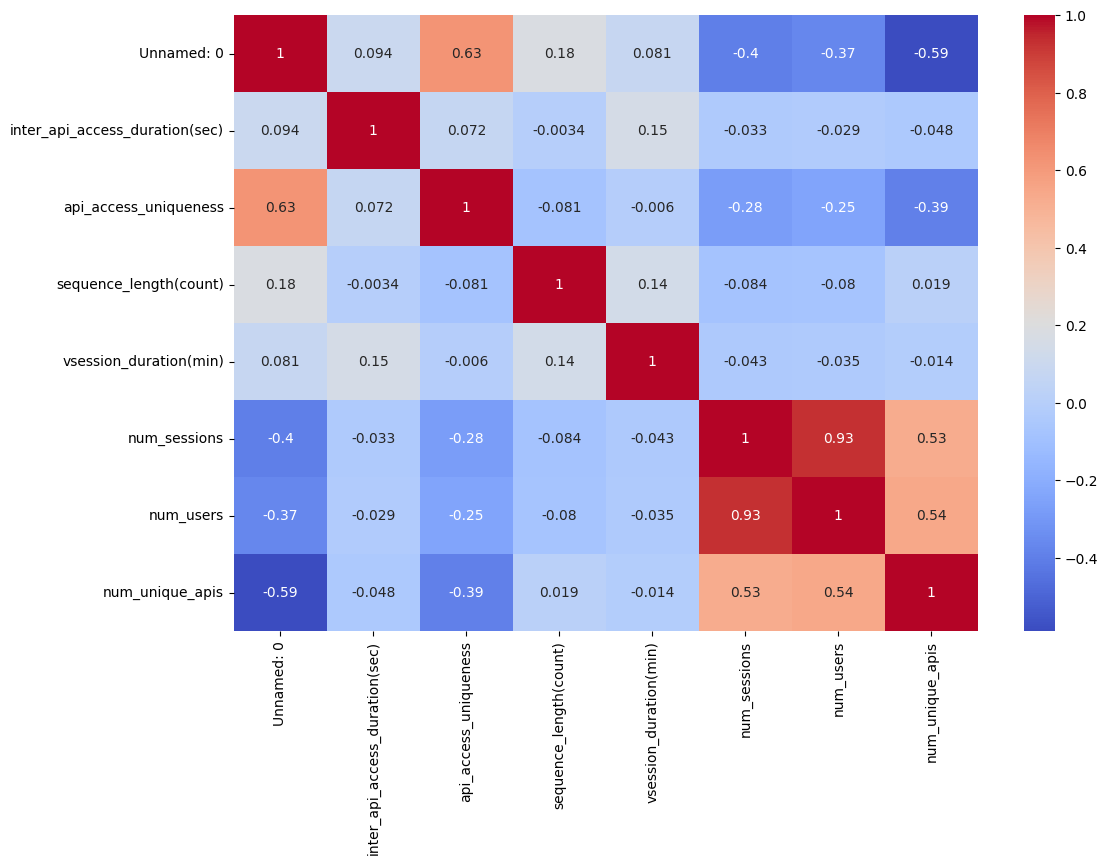

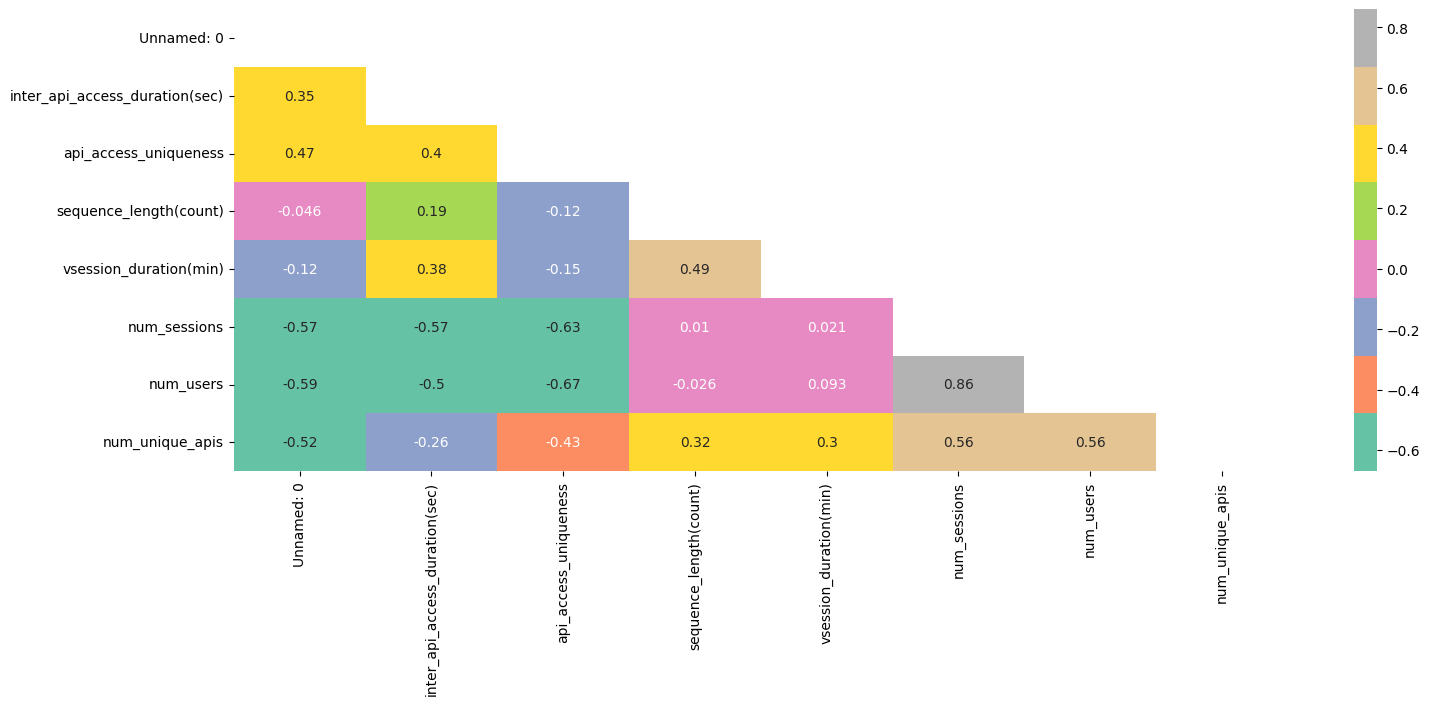

Unnamed: 0                        0
_id                               0
inter_api_access_duration(sec)    0
api_access_uniqueness             0
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
classification                    0
dtype: int64


In [8]:
# 숫자형 열만 선택하여 상관관계 계산
numeric_data = data.select_dtypes(include=[np.number])

# 상관관계 히트맵 그리기
plt.figure(figsize=(12, 8))
sn.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Kendall 방법으로 상관관계 계산 및 시각화
plt.figure(figsize=(17, 6))
corr = numeric_data.corr(method='kendall')
my_m = np.triu(corr)
sn.heatmap(corr, mask=my_m, annot=True, cmap="Set2")
plt.show()

print(data.isna().sum())

In [9]:
print(data.isna().sum())  # 결측치 확인

for i in data.columns.values:
    if len(data[i].value_counts()) < 5:
        print(i)  # 값이 5개 미만인 열 출력

cat_col = data.select_dtypes(include='object').columns.values  # 문자형 데이터 열 선택

lab = LabelEncoder()  # 라벨 인코더 생성
data['type_ip'] = lab.fit_transform(data['ip_type'])  # 'ip_type'을 숫자로 변환
data['sources'] = lab.fit_transform(data['source'])  # 'source'를 숫자로 변환
data['classifiction'] = lab.fit_transform(data['classification'])  # 'classification'을 숫자로 변환


Unnamed: 0                        0
_id                               0
inter_api_access_duration(sec)    0
api_access_uniqueness             0
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
classification                    0
dtype: int64
ip_type
source
classification


In [10]:
x = data[['sequence_length(count)', 'vsession_duration(min)', 'num_sessions', 'num_users', 'num_unique_apis', 'type_ip', 'sources']]
y = data['classifiction']
print(data['classifiction'].value_counts())  # 타겟 변수 값의 분포 확인


classifiction
0    1106
1     593
Name: count, dtype: int64


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y)  # 학습 데이터와 테스트 데이터로 분할


In [12]:
lr = LogisticRegression(max_iter=200)
lr.fit(x_train, y_train)
print('The logistic regression: ', lr.score(x_test, y_test))

xgb = XGBClassifier()
xgb.fit(x_train, y_train)
print("the Xgb : ", xgb.score(x_test, y_test))

lgb = LGBMClassifier()
lgb.fit(x_train, y_train)
print('The LGB', lgb.score(x_test, y_test))

tree = DecisionTreeClassifier(criterion='entropy', max_depth=1)
tree.fit(x_train, y_train)
print('Dtree ', tree.score(x_test, y_test))

rforest = RandomForestClassifier(criterion='entropy')
rforest.fit(x_train, y_train)
print('The random forest: ', rforest.score(x_test, y_test))

adb = AdaBoostClassifier()
adb.fit(x_train, y_train)
print('the adb ', adb.score(x_test, y_test))

grb = GradientBoostingClassifier()
grb.fit(x_train, y_train)
print('Gradient boosting ', grb.score(x_test, y_test))

bag = BaggingClassifier()
bag.fit(x_train, y_train)
print('Bagging', bag.score(x_test, y_test))


c:\Users\USER\Desktop\실습\Day9\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The logistic regression:  1.0
the Xgb :  1.0
[LightGBM] [Info] Number of positive: 433, number of negative: 841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1197
[LightGBM] [Info] Number of data points in the train set: 1274, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.339874 -> initscore=-0.663854
[LightGBM] [Info] Start training from score -0.663854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

c:\Users\USER\Desktop\실습\Day9\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [14]:
models = Sequential()
models.add(Dense(units=x.shape[1], input_dim=x.shape[1], activation=keras.activations.sigmoid))
models.add(Dense(units=x.shape[1], activation=keras.activations.sigmoid))
models.add(Dense(units=x.shape[1], activation=keras.activations.relu))
models.add(Dense(units=x.shape[1], activation=keras.activations.sigmoid))
models.add(Dense(units=1, activation=keras.activations.sigmoid))

models.compile(optimizer='adam', metrics=['accuracy'], loss=keras.losses.binary_crossentropy)

models.fit(x_train, y_train, batch_size=20, epochs=10)


Epoch 1/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3584 - loss: 0.7810  
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.5015 - loss: 0.6899
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.6643 - loss: 0.6526
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.6404 - loss: 0.6483
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.6461 - loss: 0.6364
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.6635 - loss: 0.6065
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - accuracy: 0.7350 - loss: 0.5874
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 953us/step - accuracy: 0.7900 - loss: 0.5344
Epoch 9/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8591 - loss: 0.4628
Epoch 10/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.8859 - loss: 0.4041
